In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import seaborn as sns
# import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [2]:
df=pd.read_excel('/content/Actual Data_Outlier Detection.xlsx')
df.head()

,Sex,Age,FBS,CHOL,TG,HDL,LDL,CPKMB,Hb,PT,PTT,Trop i,BPs,BPd,Heart rate,Diabetes,Smoke,Chest pain,History of shortness of breath,History of heart disease,Family history of heart disease,History of high blood pressure,Number of hospitalization days,Target
0,0,58,110,173,75,67,91.0,19,13.5,12.0,37,0,126,69,78,0,0,0,0,0,1,0,1,4
1,0,65,100,200,199,41,119.2,20,12.2,12.0,30,1,110,70,88,1,0,0,0,0,1,0,6,3
2,1,77,70,130,104,60,79.0,15,14.0,12.8,45,0,130,60,69,0,0,0,0,1,1,0,4,4
3,0,75,108,146,167,47,102.0,19,12.2,12.6,30,0,130,80,70,0,1,0,0,1,0,0,4,2
4,0,80,85,120,72,42,63.6,17,13.7,12.0,30,0,142,93,75,0,1,0,0,0,0,0,5,2


In [6]:
df.shape

(230, 24)

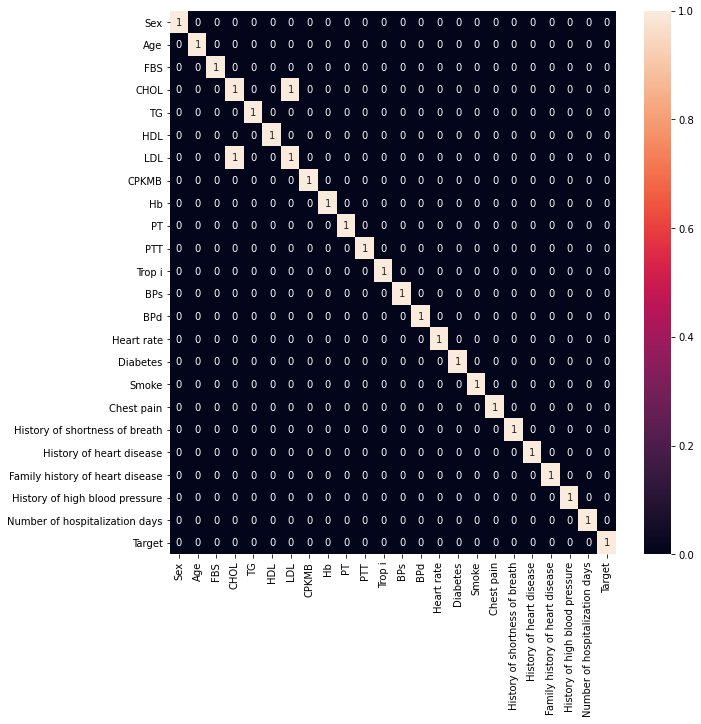

In [3]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(method='pearson')>0.7, annot=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(labels=['Target'], axis=1), 
                                                    df['Target'], test_size=0.25,
                                                    random_state=100)
X_train.shape, X_test.shape

((172, 23), (58, 23))

In [5]:
df['Target'].value_counts()

5    81
2    54
3    36
4    34
1    25
Name: Target, dtype: int64

Forward Selection

In [13]:
sfs1 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=15, class_weight={0:1,1:8}), 
           k_features=15, 
           forward=True, 
           floating=True, 
           verbose=1,
           scoring='roc_auc',
           cv=5)

sfs1 = sfs1.fit(np.array(X_train), y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Class label 0 not present.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Class label 0 not present.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Class label 0 not present.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The sco

In [14]:
selected_feat1= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat1

Index(['Sex', 'Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT',
       'PTT', 'Trop i', 'BPs', 'BPd', 'Heart rate'],
      dtype='object')

Backward Elimination

In [15]:
# step backward feature selection
# select top 15 features based on the optimal roc_auc and RandomForest Classifier

sfs2 = SFS(RandomForestClassifier(n_jobs=-1,n_estimators=100,max_depth=15, class_weight={0:1,1:8}), 
           k_features=15, 
           forward=False, 
           floating=True, 
           verbose=1,
           scoring='roc_auc',
           cv=5)

sfs2 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Class label 0 not present.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Class label 0 not present.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Class label 0 not present.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The sco

In [16]:
selected_feat2= X_train.columns[list(sfs2.k_feature_idx_)]
selected_feat2

Index(['Sex', 'Age', 'FBS', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PT',
       'PTT', 'Trop i', 'BPs', 'BPd', 'Heart rate'],
      dtype='object')

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Build a forest and compute the feature importances
forest = RandomForestClassifier(n_jobs=-1,n_estimators=50, class_weight={1:8,2:4},
                              random_state=0)

forest.fit(X_train, y_train)
preds = forest.predict(X_test)
importances = forest.feature_importances_


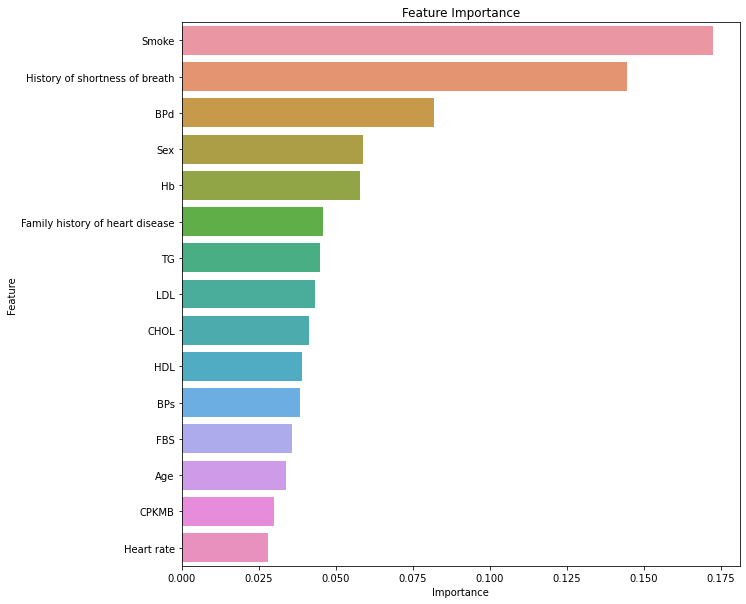

In [26]:
#Plot the feature importances
feat_imp = pd.DataFrame(list(zip(X_train.columns, importances)), columns = ["feature", "importance"])
feat_imp = feat_imp.sort_values("importance", ascending = False).iloc[0:15, :]

fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(y="feature", x="importance", data=feat_imp)
ax.set_title('Feature Importance')
ax.set_xlabel('Importance')
ax.set_ylabel('Feature')

plt.show()

In [27]:
# Import Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [28]:
# Calcualte the Fisher Score (chi2) between each feature and target
fisher_score = chi2(X_train.fillna(0), y_train)
fisher_score

(array([2.23813171e+01, 9.92615713e+00, 6.32155623e+00, 1.50773731e+01,
        1.29278086e+02, 2.02170748e+01, 3.85986749e+01, 5.06882367e+01,
        3.74767239e+00, 3.61818395e-02, 1.52459536e+00, 1.30945473e+00,
        2.19636396e+01, 3.30462606e+01, 6.09880887e+00, 3.60000000e+01,
        1.22970389e+02, 1.09278375e+01, 1.06035080e+02, 5.46687054e+00,
        7.73527232e+01, 1.82250449e+00, 5.44160747e+00]),
 array([1.68261948e-04, 4.16900963e-02, 1.76386792e-01, 4.54340137e-03,
        5.55625999e-27, 4.52454464e-04, 8.43113632e-08, 2.59342037e-10,
        4.41230261e-01, 9.99838320e-01, 8.22275959e-01, 8.59769367e-01,
        2.03788204e-04, 1.16871168e-06, 1.91889687e-01, 2.89369615e-07,
        1.23907146e-25, 2.73871055e-02, 5.09694176e-22, 2.42656971e-01,
        6.33288244e-16, 7.68362547e-01, 2.44910111e-01]))

In [29]:
p_values = pd.Series(fisher_score[1])
p_values.index = X_train.columns
p_values.sort_values(ascending=True)

TG                                 5.556260e-27
Smoke                              1.239071e-25
History of shortness of breath     5.096942e-22
Family history of heart disease    6.332882e-16
CPKMB                              2.593420e-10
LDL                                8.431136e-08
Diabetes                           2.893696e-07
BPd                                1.168712e-06
Sex                                1.682619e-04
BPs                                2.037882e-04
HDL                                4.524545e-04
CHOL                               4.543401e-03
Chest pain                         2.738711e-02
Age                                4.169010e-02
FBS                                1.763868e-01
Heart rate                         1.918897e-01
History of heart disease           2.426570e-01
Number of hospitalization days     2.449101e-01
Hb                                 4.412303e-01
History of high blood pressure     7.683625e-01
PTT                                8.222

In [30]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# mutual_info_classif, mutual_info_regression: Functions for calculating Mutual Information Between classes and the target
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [31]:
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.1491138 , 0.04784259, 0.02975575, 0.        , 0.        ,
       0.        , 0.01495459, 0.0285878 , 0.07627254, 0.        ,
       0.        , 0.        , 0.02481313, 0.00885868, 0.        ,
       0.09387983, 0.4710773 , 0.05685897, 0.35158683, 0.11169061,
       0.32718621, 0.03367607, 0.00955692])

In [32]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

Smoke                              0.471077
History of shortness of breath     0.351587
Family history of heart disease    0.327186
Sex                                0.149114
History of heart disease           0.111691
Diabetes                           0.093880
Hb                                 0.076273
Chest pain                         0.056859
Age                                0.047843
History of high blood pressure     0.033676
FBS                                0.029756
CPKMB                              0.028588
BPs                                0.024813
LDL                                0.014955
Number of hospitalization days     0.009557
BPd                                0.008859
PT                                 0.000000
PTT                                0.000000
HDL                                0.000000
TG                                 0.000000
CHOL                               0.000000
Heart rate                         0.000000
Trop i                          

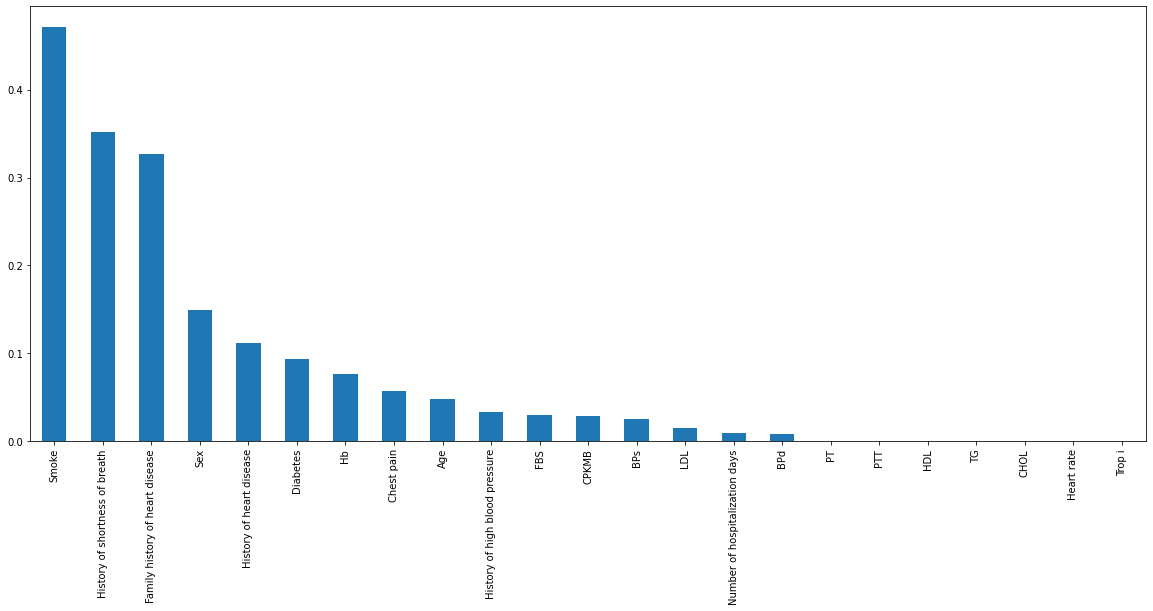

In [33]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [34]:
# Import Dependenices
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

Univariate Feature Selection using Classification

In [35]:
# Calculate Univariate Statistical measure between each variable and target
univariate = f_classif(X_train.fillna(0), y_train)
univariate

(array([1.44605236e+01, 8.23956678e-01, 2.14888091e-01, 6.21492274e-01,
        1.13249051e+00, 2.54456649e+00, 1.29332386e+00, 1.18340082e+00,
        6.46496406e+00, 7.95201187e-02, 7.50177684e-01, 3.44505306e-01,
        1.88289318e+00, 5.60861051e+00, 1.03666199e+00, 1.16511628e+01,
        6.39385146e+02, 3.10213167e+00, 1.10771262e+02, 2.86977070e+00,
        6.37640638e+01, 4.84099597e-01, 1.54048115e+00]),
 array([3.68856948e-010, 5.11601762e-001, 9.29883083e-001, 6.47796958e-001,
        3.42993912e-001, 4.14705559e-002, 2.74698313e-001, 3.19984533e-001,
        7.33426221e-005, 9.88508953e-001, 5.59198608e-001, 8.47567593e-001,
        1.15721395e-001, 2.92403722e-004, 3.89955679e-001, 2.28057188e-008,
        4.46228958e-100, 1.70548298e-002, 6.40640894e-046, 2.47428725e-002,
        1.22991870e-032, 7.47392742e-001, 1.92745945e-001]))

In [36]:
# Capture P values in a series
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

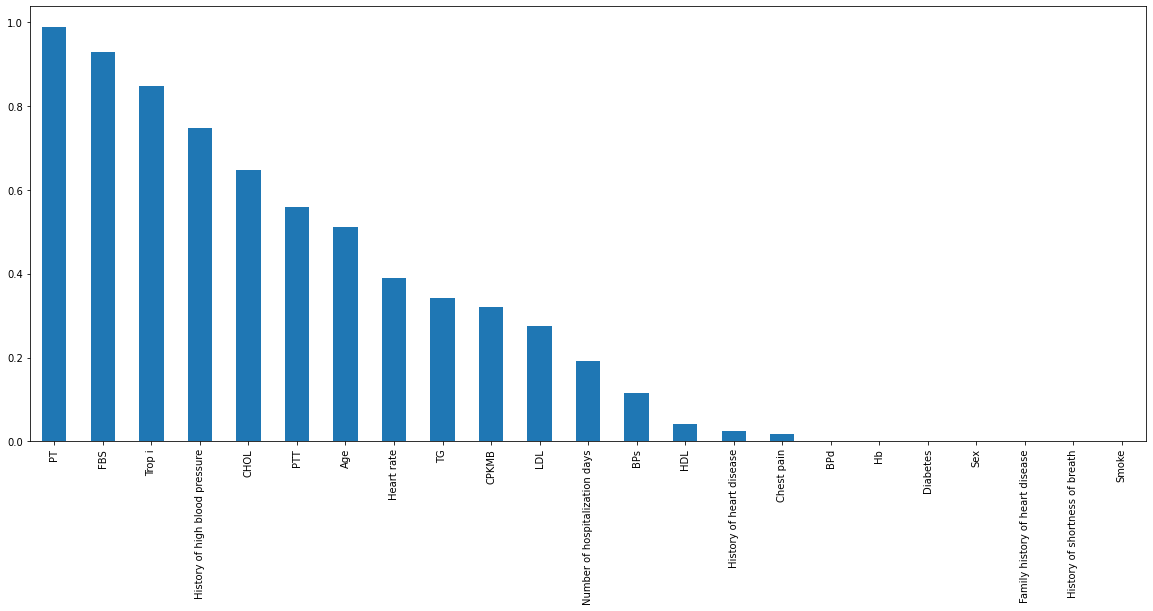

In [37]:
# Plot the P values
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [38]:
# Select K best Features
k_best_features = SelectKBest(f_classif, k=20).fit(X_train.fillna(0), y_train)
X_train.columns[k_best_features.get_support()]

Index(['Sex', 'Age', 'CHOL', 'TG', 'HDL', 'LDL', 'CPKMB', 'Hb', 'PTT', 'BPs',
       'BPd', 'Heart rate', 'Diabetes', 'Smoke', 'Chest pain',
       'History of shortness of breath', 'History of heart disease',
       'Family history of heart disease', 'History of high blood pressure',
       'Number of hospitalization days'],
      dtype='object')